<div style="border:1px solid black; padding:10px 10px;">
    <strong>CIVIL-321 "Modélisation Numérique des Solides et Structures"</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">Comment utiliser ce Jupyter Notebook?
    </span><br/><br/>
    Ce <strong>Notebook</strong> est constitué de cellules de texte et de cellule de code. Les cellules de codes doivent être  <strong>executées</strong> pour voir le résultat du programme. Certaines cellules doivent être remplies par vos soins. Pour exécuter une cellule, cliquez dessus simplement et ensuite cliquez sur le bouton "play" (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) dans la barre de menu au dessus du notebook. Vous pouvez aussi taper la combinaison de touches <code>shift + enter</code>. Il est important d'éxécuter les cellules de code en respectant leur ordre d'arrivée dans le notebook.
</div>

# Résolution d'un problème à plusieurs barres

## Installation des modules

In [1]:
import numpy as np
from plot import *

## À lire avant de commencer

- Les index sur Python commence à 0 (et non à 1 contrairement à Matlab). C'est pourquoi, nous fixerons nos premiers paramètres (nœuds, éléments, lignes et colonnes des matrices, etc) avec la valeur 0.

- La fonction "plot_matrix(matrix, matrix_name)" permet de visualiser les matrices. Elle prend en entrée:
        - matrix : le nom de la variable       
        - matrix_name = 'nom_matrix' : par exemple, matrix_name prendra les valeurs de 'C' si on veut la matrice de connectivité.
        - 
        
        
- Ce Notebook se décompose en 4 parties:
        1. Matrice de connectivité
        2. Matrice de numérotation d'équation
        3. Matrice de raideur

## 1. Matrice de connectivité

Dans cette section, nous tacherons de comprendre les différentes variables influençant la matrice de connectivité. Nous définissons une structure de référence à l'aide des matrices de positions et de connectivité suivantes :

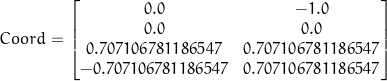

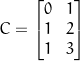

In [2]:
positions = np.array([
    [0, -1],
    [0, 0],
    np.array([1, 1])/np.sqrt(2),
    np.array([-1, 1])/np.sqrt(2)
])
plot_matrix(positions, 'Coord')

conn = [
    [0, 1],
    [1, 2],
    [1, 3]
]
plot_matrix(conn, 'C')

Ce qui graphiquement correspond à la structure suivante :

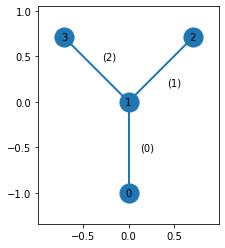

In [3]:
plot_structure(positions, conn)

### 1.1.  Influence de la numérotation des éléments

- Pour changer la numérotation des éléments, il suffit de permuter les lignes de la matrice de connectivité, sans changer la position des nœuds. 
- Par exemple :

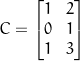

In [4]:
conn = [
    [1, 2],
    [0, 1],
    [1, 3]
]

plot_matrix(conn, 'C')

positions = [
    [0, -1],
    [0, 0],
    np.array([1, 1])/np.sqrt(2),
    np.array([-1, 1])/np.sqrt(2)
]

**Question:**

- Quel impact y a-t-il lorsque nous inversons les lignes de la matrice de connectivité sur la structure ? 

- Vérifier votre réponse en affichant la structure avec la fonction _plot_structure_.

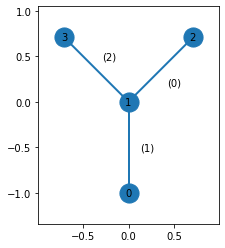

In [5]:
###########
# Solution:
##########


# La structure reste inchangée en revanche, la numérotation des éléments barre est redéfinie.
plot_structure(positions, conn)

### 1.2. Influence de la position des nœuds

- Pour changer la numérotation des noeuds, il suffit de changer leurs positions.
- Par exemple, on peut permuter les noeuds 1 et 3 de la façon suivante :

In [6]:
positions = [
    [0, -1],
    np.array([-1, 1])/np.sqrt(2),
    np.array([1, 1])/np.sqrt(2),
    [0, 0]
]

- Modifier la matrice de connectivité associée à ce changement :

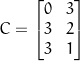

In [7]:
###########
# Solution:
##########


conn = [
    [0, 3],
    [3, 2],
    [3, 1]
]

plot_matrix(conn, 'C')

- Vérifier sur la figure ci-dessous que les nœuds 1 et 3 ont bien permuté.

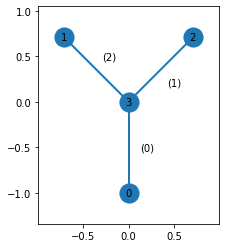

In [8]:
plot_structure(positions, conn)

**Question:**

Quel impact y a-t-il lorsque l'on permutte les nœuds sur la matrice de connectivité ?

---

 **Solution:**

 ---



La matrice de connectivité est complètement redéfinie. Il n'existe pas de règle entre un changement dans la matrice de connectivité et une permutation des nœuds.

### 1.3. Influence des matrices positions et de connectivité sur la structure

- Dessiner sur papier la structure obtenue si nous définissons la matrice C et la position des nœuds comme suit :

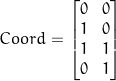

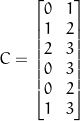

In [9]:
positions = [
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1]
]
plot_matrix(positions, 'Coord')


conn = [
    [0, 1],
    [1, 2],
    [2, 3],
    [0, 3],
    [0, 2],
    [1, 3],
]

plot_matrix(conn, 'C')

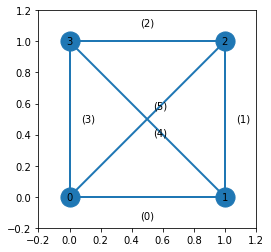

In [10]:
###########
# Solution:
##########


plot_structure(positions, conn)

## 2. La matrice de numérotation d'équation

Dans cette section, nous allons introduire les degrés de libertés (ddl) de chaque nœud. Chaque degré de liberté est associé à une équation. Il est ainsi possible de définir la matrice de numérotation d'équation $\boldsymbol{E_{qn}}$, utile lors de l'assemblage de la matrice de raideur $\boldsymbol{K}$.

- Reprenons notre structure de référence. Si on ajoute à l'affichage les indices des ddl $[i, j]$ pour chaque nœud, alors on obtient:

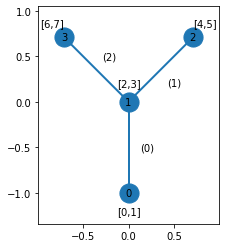

In [11]:
positions = [
    [0, -1],
    [0, 0],
    np.array([1, 1])/np.sqrt(2),
    np.array([-1, 1])/np.sqrt(2)
]

conn = [
    [0, 1],
    [1, 2],
    [1, 3]
]

# La variable plot_eqn = 'packed' sert simplement à ajouter les ddl sur le plot. 
# La variable ret est utilisée pour sortir la matrice Eqn associée. 

ret = plot_structure(positions, conn, plot_eqn='packed')

### 2.1. Définition de la matrice de numérotation par nœud $\boldsymbol{E_{qn}}$

- La matrice $\boldsymbol{E_{qn}}$ associée est telle que :

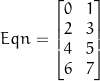

In [12]:
plot_matrix(ret['eqn_node'], 'Eqn')

**Question :**

- Que représente cette matrice ? 
- Définir les lignes et les colonnes de cette matrice.

---

 **Solution:**

 ---



Elle permet de représenter les ddls de chaque nœud. Plus particulièrement, les lignes correspondent aux nœuds de la structure et les colonnes aux ddls associés.

### 2.2. Définition de la matrice de numérotation par éléments $\boldsymbol{E_{qe}}$

- La matrice $\boldsymbol{E_{qe}}$ associée est telle que :

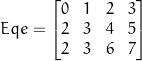

In [13]:
plot_matrix(ret['eqn_elem'], 'Eqe')

**Question:**

- Que représente cette matrice ? 

- Définir les lignes et les colonnes de cette matrice afin de bien comprendre la différence entre $\boldsymbol{E_{qn}}$ et $\boldsymbol{E_{qe}}$.

---

 **Solution:**

 ---



Elle permet de représenter les ddls de chaque élément, triés par nœuds. Plus particulièrement, les lignes correspondent aux éléments barres et les colonnes aux ddls de ces éléments. Dans ce cas, nous considérons deux ddls par nœuds. Ainsi, les deux premières colonnes correspondent au premier nœud de la barre alors que les deux dernières au deuxième nœud.

### 2.3. Influence de la définition des ddl associés à chacun des nœuds.

- Définir la matrice " eqn_node " comme variable telle que les lignes (0) et (1) soient inversées. Indication : définir la variable à l'aide de _np.array()_.

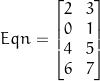

In [14]:
###########
# Solution:
##########


eqn_node = np.array([
    [2, 3],
    [0, 1],
    [4, 5],
    [6, 7]
])

plot_matrix(eqn_node, 'Eqn')

- Visualiser la structure avec la nouvelle matrice $\boldsymbol{E_{qn}}$ définie précédemment.

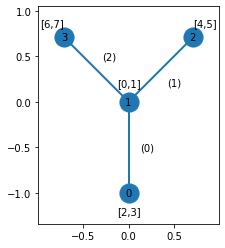

In [15]:
ret = plot_structure(positions, conn, plot_eqn=eqn_node)

**Question:**

Quel impact cela aura-t-il sur la matrice de numéro d'équation par éléments ? Écrire la nouvelle matrice $\boldsymbol{E_{qe}}$.

---

 **Solution:**

 ---



Les ddls des nœuds 0 et 1 sont simplement inversés.

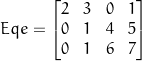

In [16]:
###########
# Solution:
##########


eqn_elem = np.array([
    [2, 3, 0, 1],
    [0, 1, 4, 5],
    [0, 1, 6, 7]
])

plot_matrix(eqn_elem, 'Eqe')

### 2.4. Influence de la position des nœuds

- Nous permutons les nœuds 1 et 2 dans la matrice "positions".

In [17]:
positions = [
    [0, -1],
    np.array([1, 1])/np.sqrt(2),
    [0, 0],
    np.array([-1, 1])/np.sqrt(2)
]

- Écrire la matrice de connectivité associée à ce changement.

In [18]:
###########
# Solution:
##########


conn = [
    [0, 2],
    [2, 1],
    [2, 3]
]

- Vérifier sur la figure ci-dessous que les nœuds 1 et 2 ont bien permuté.

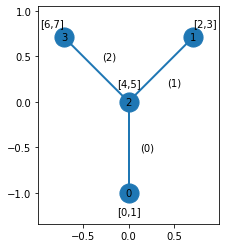

In [19]:
ret = plot_structure(positions, conn, plot_eqn="packed")

**Question:**

Quel impact cela aura-t-il sur la matrice de numérotation d'équation par éléments $\boldsymbol{E_{qe}}$ ? Écrire la nouvelle matrice $\boldsymbol{E_{qe}}$.

---

 **Solution:**

 ---



Les ddls des nœuds 0 et 1 sont simplement inversés.

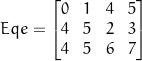

In [20]:
###########
# Solution:
##########


plot_matrix(ret['eqn_elem'], 'Eqe')

### 2.5. Sur la base de l'exemple 1.3. , comment définiriez vous les matrices $\boldsymbol{E_{qn}}$ et $\boldsymbol{E_{qe}}$?

- Pour rappel, les matrices de connectivité et de positions sont telles que :

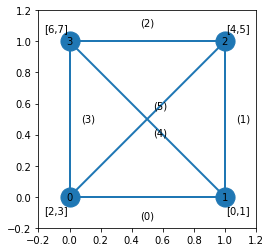

In [21]:
positions = [
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1]
]

conn = [
    [0, 1],
    [1, 2],
    [2, 3],
    [0, 3],
    [0, 2],
    [1, 3],
]
ret = plot_structure(positions, conn, plot_eqn=eqn_node)

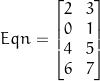

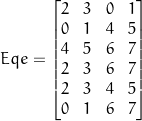

In [22]:
###########
# Solution:
##########


plot_matrix(ret['eqn_node'], 'Eqn')
plot_matrix(ret['eqn_elem'], 'Eqe')

### 2.6. Influence du regroupement les ddl

Reprenons notre structure de référence. Pour rappel, nous avons :

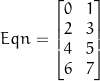

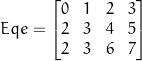

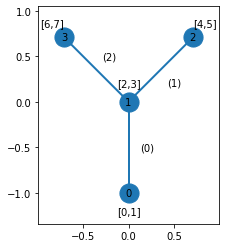

In [23]:
positions = [
    [0, -1],
    [0, 0],
    np.array([1, 1])/np.sqrt(2),
    np.array([-1, 1])/np.sqrt(2)
]

conn = [
    [0, 1],
    [1, 2],
    [1, 3]
]

ret = plot_structure(positions, conn, plot_eqn='packed')
plot_matrix(ret['eqn_node'], 'Eqn')
plot_matrix(ret['eqn_elem'], 'Eqe')

Dans cette partie, nous changeons la façon de grouper les ddls. Nous choissisons de ne plus les grouper par nœuds, c'est-à-dire (d1x, d1y, d2x, d2y) mais par variables (d1x, d2x, d1y, d2y).

**Question:**

- Comment s'écrirait la matrice Eqe?

In [24]:
###########
# Solution:
##########


eqn_elem = [
    [0, 2, 1, 3],
    [2, 4, 3, 5],
    [2, 6, 3, 7]
]

## 3. Matrice de raideur

Afin de traiter cette partie dans le cas le plus général, nous utiliserons une écriture symbolique. Pour cela, nous utilisons la fonction _Symbol_ qui prend en entrée le nom de la variable et le type de variable (réelle, positive, etc). Les valeurs numériques pourront être affectées à l'aide de la fonction _subs_.

### 3.1. Barre inclinée

Nous nous intéressons à la matrice de raideur dans le cas d'une barre tounée, c'est-à-dire que nous étudirons ses composantes en fonction de l'angle de rotation de la barre. 

En executant la cellule ci-dessous, un schéma d'une barre de treillis tournée s'affiche :

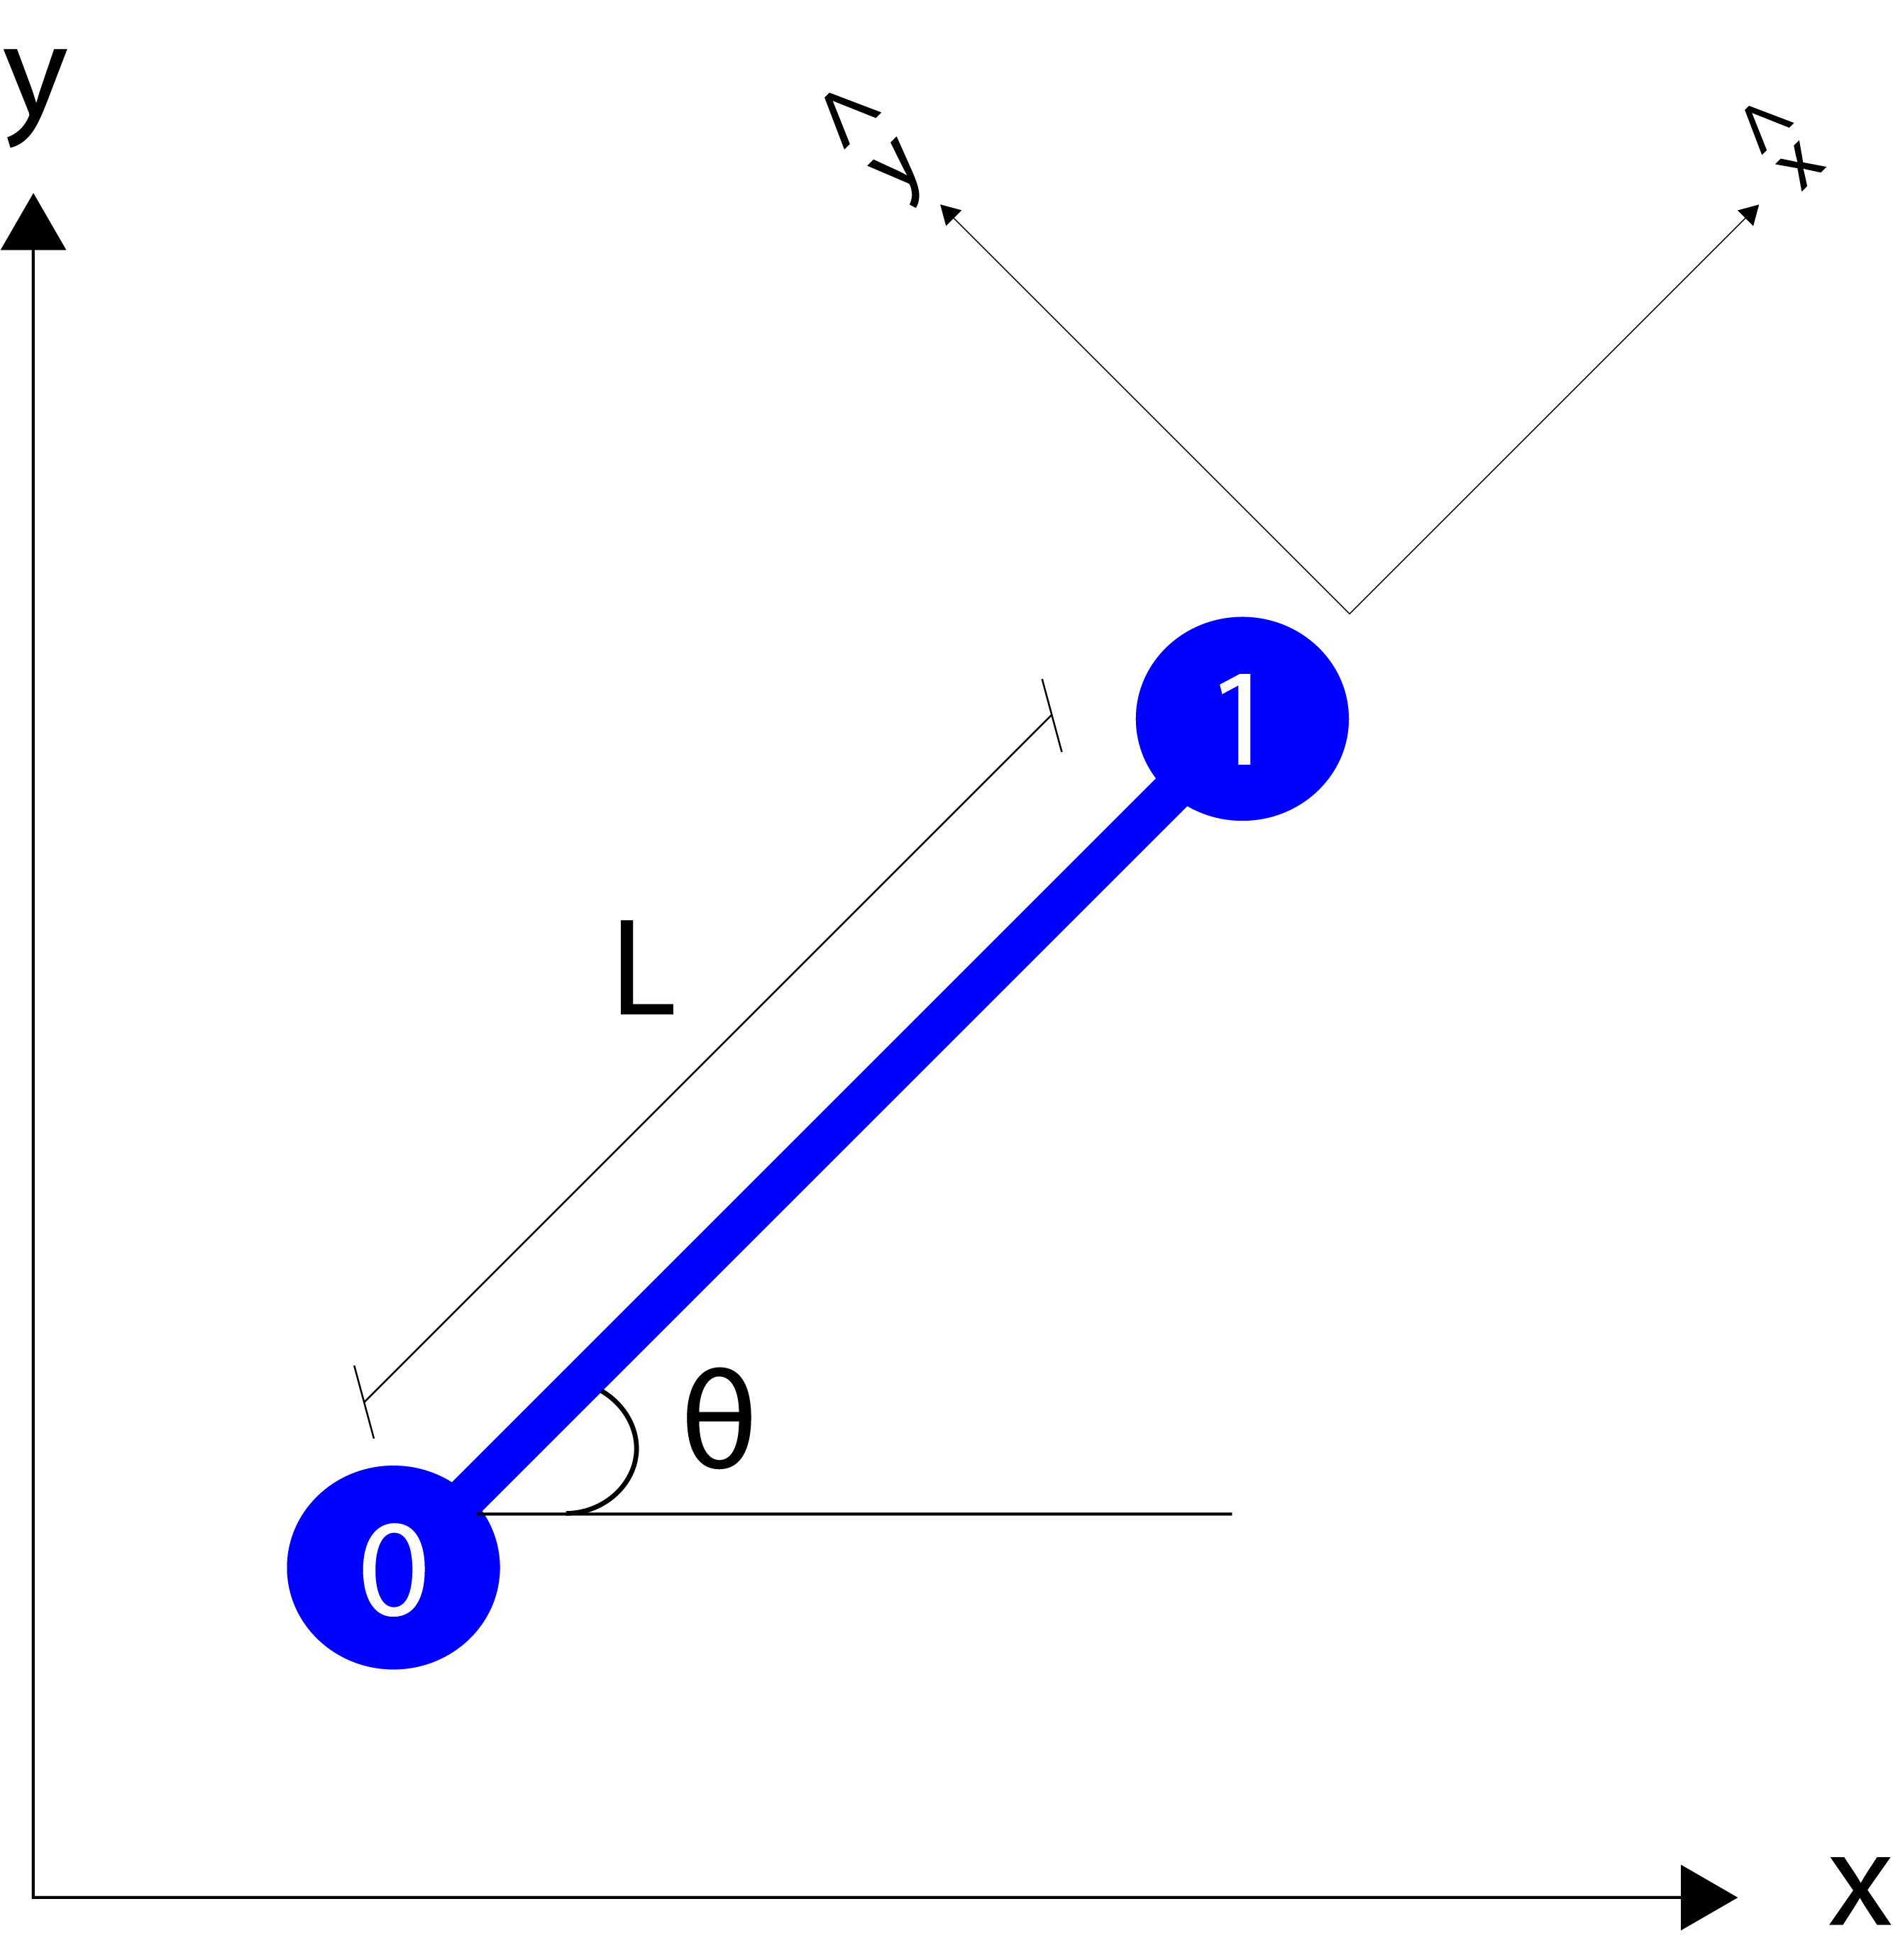

In [25]:
Image(filename = './Figures/barre_rotated.png',  width=200, height=200)

On définit les symboles correspondant à l'angle $\theta$ et à la longueur $L$ de la barre.

In [26]:
theta = Symbol(r'\theta', real=True)

L = Symbol('L', real=True, positive=True)

- Écrire la matrice de positions associée à l'exemple, sous la forme :
    positions = Matrix([
    ...
    ])
- Exprimer la matrice de connectivité à partir des variables L et theta, sous la forme :
    conn = np.array([
    ...
    ])

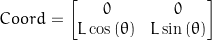

In [27]:
###########
# Solution:
##########


positions = Matrix([
    [0, 0],
    [L*cos(theta), L*sin(theta)]
])

plot_matrix(positions, 'Coord')

conn = np.array([
    [0, 1]
])

plot_matrix(conn, 'C')

#### Matrice de rotation

- La fonction _calculerMatriceRotation_ permet de calculer le bloc matrice $r$ en entrant comme paramètre la position du nœud 0 (p0), et la position du nœud 1 (p1). Elle retourne également la longueur L de la barre. 


- On spécifie que la variable $r$ est une matrice à l'aide de Matrix(r)


- La fonction _simplify_ permet de simplifier l'écriture d'une matrice.

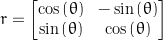

In [28]:
p0 = positions[0, :]
p1 = positions[1, :]

r, _L = calculerMatriceRotation(p0, p1)
r = simplify(Matrix(r))
plot_matrix(r, 'r')

- La matrice de rotation R est définie par $R = \begin{bmatrix} r & 0 \\ 0 & r \end{bmatrix}$.

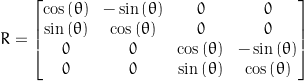

In [29]:
R = zeros(4, 4)
R[0:2, 0:2] = r
R[2:4, 2:4] = r

plot_matrix(R, 'R')

#### Matrice de raideur

- Définir le module d'elasticité E et l'aire A de la barre de la même manière que nous l'avons fait pour la longueur L i.e.

    _L = Symbol('L', real=True, positive=True)_

- Faites attention à préciser le type de variable considérée (réelle, positive, etc.)

In [30]:
###########
# Solution:
##########


E = Symbol('E', real=True, positive=True)
A = Symbol('A', real=True, positive=True)

- La fonction _calculerMatriceRigiditeLocale_ calcule la matrice de rigidité locale en prenant comme paramètre la rigidité de la barre k. 
- Écrire $k$ en fonction de $E$, $A$ et $L$.

In [31]:
###########
# Solution:
##########

k = E*A/L

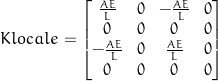

In [32]:
Klocale = calculerMatriceRigiditeLocale(k)
Klocale = Matrix(Klocale)

Klocale = simplify(Klocale)
plot_matrix(Klocale, 'Klocale')

**Question :**

Dans la partie 2.6. précédente, les ddl ont été groupés par variables (d1x, d2x, d1y, d2y) et non plus par nœuds (d1x, d1y, d2x, d2y).

- Quel est l'influence de ce changement sur la matrice de raideur K? 

- En quoi un tel changement serait utile?

---

 **Solution:**

 ---



Les termes non nuls de la matrice de raideur $\boldsymbol{K}$ sont tous regroupés le long d'une diagonale. Cela peut fortement diminuer le temps de calcul d'un code en éléments finis (simplification des produits matriciels, etc.)

- Pour rappel, la matrice de rigidité dans le repère global s'exprime par : 

$$ K = R K^{locale} R^T $$

D'où :

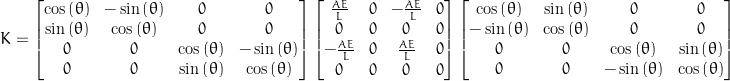

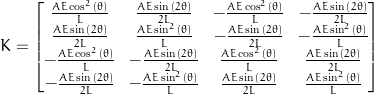

In [33]:
plot_matrix_product(R, Klocale, R.T, 'K')
plot_matrix(simplify(R@Klocale@R.T), 'K')

- La fonction _assemblerMatriceRigidite_ permet d'assembler la matrice de rigidité. Elle prend en entrée la positions des nœuds, la matrice de connectivité et le produit E*A Dans la cas d'une seule barre, la matrice assemblée correspond à la matrice de rigidité $\boldsymbol{K}$ précédente.

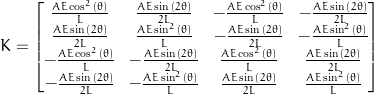

In [34]:
K = assemblerMatriceRigidite(positions, conn, [E*A])
K = simplify(Matrix(K))
plot_matrix(K, 'K')

**Question :**

Dans les cas particuliers de $\theta = 90^\circ$ et $\theta = 180^\circ$, comparer la matrice de raideur K avec la matrice de raideur locale d'une barre

_Indications_ : 
- pour définir des valeurs numériques aux variables, il vous suffit de créer un dictionnaire _values = {...}_ qui spécifie la longueur à 1 m et l'angle de la barre à $\pi$/4

In [35]:
values = { L : 1, theta : pi/4}

- Pour affecter une valeur à une variable, il suffit d'écrire _variable.subs(values)_. Par exemple, si on souhaite connaître la variable des positions, on écrit :

    _positions.subs(values)_

- Pour répondre à cette question, il vous faudra aussi définir le module de Young $E$ et la section $A$.

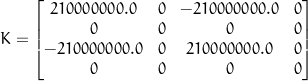

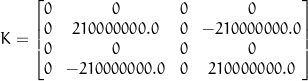

In [36]:
###########
# Solution:
##########


# theta = pi
values = {L:1, theta:pi, A:1, E:210e6}
K.subs(values)
plot_matrix(K.subs(values), 'K')

# theta = pi/2
values = {L:1, theta:pi/2, A:1, E:210e6}
K.subs(values)
plot_matrix(K.subs(values), 'K')

### 3.2. Treillis

Nous nous intéressons maintenant au cas des treillis, c'est-à-dire à des structures composées de plusieurs barres. 
- Definissez la positions de 4 nœuds selon votre choix : _positions = np.array([...])_
- Définissez la matrice de connectivité selon votre choix : _conn = np.array([...])_
- Afficher graphiquement la structure avec la fonction _plot_structure_

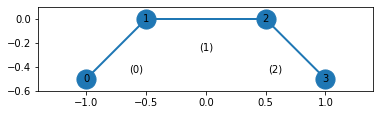

In [37]:
###########
# Solution:
##########


# Par exemple, on peut choisir :

positions = np.array([
    [-1., -.5],
    [-.5, 0],
    [.5, 0],
    [1., -.5]
])

conn = np.array([
    [0, 1],
    [1, 2],
    [2, 3]
])

plot_structure(positions, conn)

- La fonction _plot_bloc_stiffness_ permet de representer étape par étape - ou encore barre après barre - l'assemblage de la matrice de raideur. Sur le profil de la matrice K, seules les composantes non nulles apparaissent.

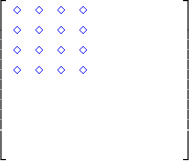

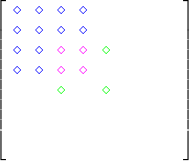

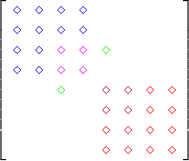

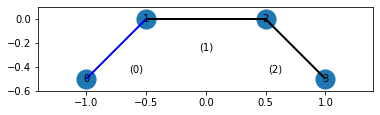

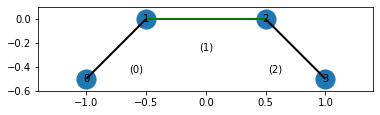

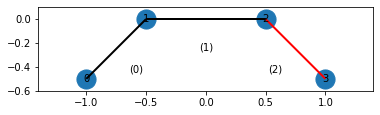

In [38]:
# Le module d'élasticité et l'aire sont définis comme :
E = 210e6
A = 1 

plot_bloc_stiffness(positions, conn, E, A, nb_barre=len(conn))

**Question:**

- Dans quelle géométrie n'observons-nous pas un bloc de couleur en entier i.e. que la matrice de raideur de l'élément considérée contient des éléments nuls ?

- Vérifier votre affirmation en relançant les simulations pour la géométrie mentionnée.

---

 **Solution:**

 ---



Dans le cas d'une barre horizontale, les composantes correspondant aux ddls verticaux de la matrice de raideur sont nulles.

- Rajouter une barre entre deux nœuds qui ne sont pas déjà reliés (faites le en changeant la matrice de connectivité).

In [39]:
###########
# Solution:
##########


# Dans notre exemple, on peut relier les nœuds 1 et 3 :

conn = np.array([
    [0, 1],
    [1, 2],
    [2, 3],
    [1, 3]
])

- Expliquez la nouvelle forme de la matrice de raideur.

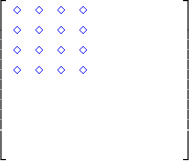

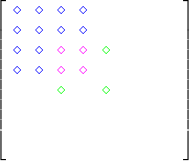

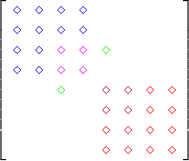

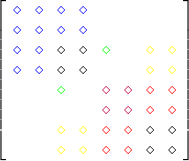

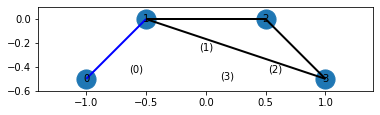

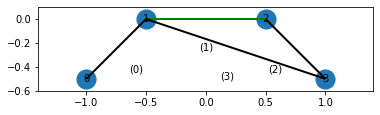

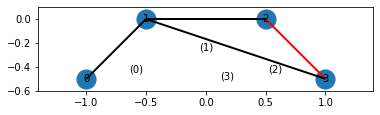

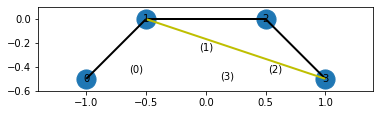

In [40]:
###########
# Solution:
##########


# La solution peut être visualisée graphiquement (composantes jaunes et noirs)

plot_bloc_stiffness(positions, conn, E, A, nb_barre=len(conn))

In [41]:
votre_opinion_compte('Cours-Treillis')